In [1]:

import pandas as pd
import matplotlib.pyplot as plt


In [2]:

df = pd.read_csv("shopping_behavior_cleaned.csv")
df.head()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Season,Review Rating,Subscription Status,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases,Frequency Value
0,1,55,Male,Blouse,Clothing,53,Winter,3.1,1,1,1,14,Bi-Weekly,4
1,2,19,Male,Sweater,Clothing,64,Winter,3.1,1,1,1,2,Bi-Weekly,4
2,3,50,Male,Jeans,Clothing,73,Spring,3.1,1,1,1,23,Weekly,5
3,4,21,Male,Sandals,Footwear,90,Spring,3.5,1,1,1,49,Weekly,5
4,5,45,Male,Blouse,Clothing,49,Spring,2.7,1,1,1,31,Annually,1


In [3]:

bins = [0, 19, 39, 59, 79, 99, float('inf')]
labels = ['< $19', '$20 - $39', '$40 - $59', '$60 - $79', '$80 - $99', '$100 +']

# Create new column
df['Spending Tier'] = pd.cut(df['Purchase Amount (USD)'], bins=bins, labels=labels, right=True)


In [4]:

# Group by Spending Tier and Subscription Status
subscription_counts = df.groupby(['Spending Tier', 'Subscription Status']).size().unstack(fill_value=0)
subscription_counts.columns = ['Not Subscribed', 'Subscribed']
subscription_counts


C:\Users\ssjwa\AppData\Local\Temp\ipykernel_16468\465093893.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subscription_counts = df.groupby(['Spending Tier', 'Subscription Status']).size().unstack(fill_value=0)


,Not Subscribed,Subscribed
Spending Tier,,
< $19,0,0
$20 - $39,741,273
$40 - $59,672,251
$60 - $79,678,261
$80 - $99,732,256
$100 +,24,12


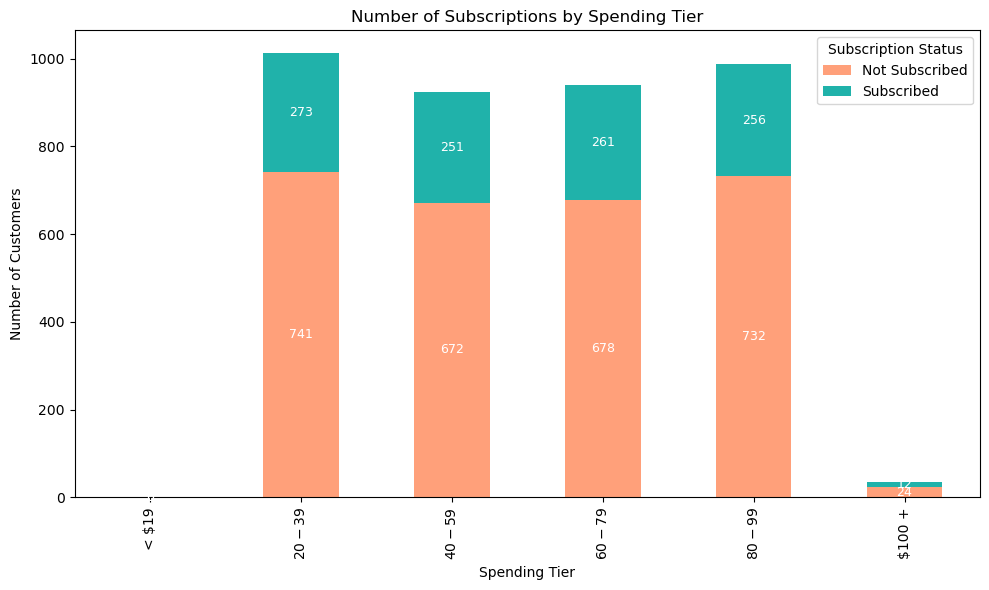

In [5]:

# Plot stacked bar chart with labels
ax = subscription_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#FFA07A', '#20B2AA'])

plt.title('Number of Subscriptions by Spending Tier')
plt.xlabel('Spending Tier')
plt.ylabel('Number of Customers')
plt.legend(title='Subscription Status', labels=['Not Subscribed', 'Subscribed'])

# Add value labels
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=9, color='white')

plt.tight_layout()
plt.show()
